In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('DATA/train.csv')

X, Y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=80, activation='relu',
                    solver='sgd', verbose=1, random_state=42,
                    learning_rate_init=0.02, batch_size=100)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


Iteration 1, loss = 0.51598582
Iteration 2, loss = 0.22662288
Iteration 3, loss = 0.17241198
Iteration 4, loss = 0.13683126
Iteration 5, loss = 0.11274542
Iteration 6, loss = 0.09743365
Iteration 7, loss = 0.08262785
Iteration 8, loss = 0.06940925
Iteration 9, loss = 0.05936804
Iteration 10, loss = 0.05134646
Iteration 11, loss = 0.04440200
Iteration 12, loss = 0.03867355
Iteration 13, loss = 0.03204248
Iteration 14, loss = 0.02769330
Iteration 15, loss = 0.02457293
Iteration 16, loss = 0.02165244
Iteration 17, loss = 0.01761320
Iteration 18, loss = 0.01467475
Iteration 19, loss = 0.01151170
Iteration 20, loss = 0.01032454
Iteration 21, loss = 0.00826203
Iteration 22, loss = 0.00727770
Iteration 23, loss = 0.00593445
Iteration 24, loss = 0.00448566
Iteration 25, loss = 0.00377121
Iteration 26, loss = 0.00316559
Iteration 27, loss = 0.00283794
Iteration 28, loss = 0.00244241
Iteration 29, loss = 0.00216410
Iteration 30, loss = 0.00207586
Iteration 31, loss = 0.00194722
Iteration 32, los

0.9715873015873016

Prediccion de la imagen: [9]


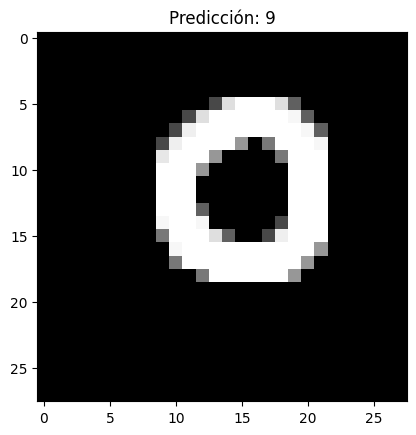

Prediccion de la imagen: [0]


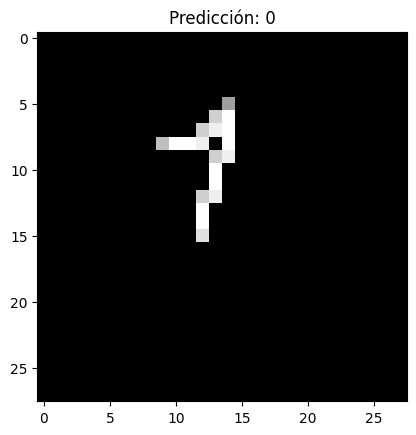

Prediccion de la imagen: [7]


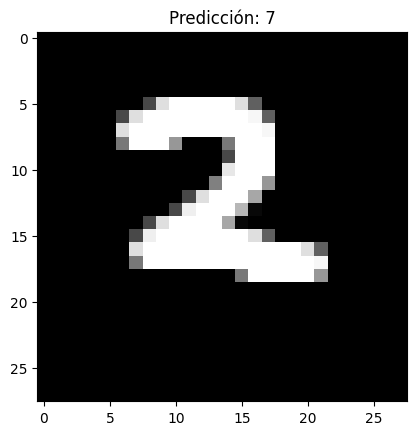

Prediccion de la imagen: [3]


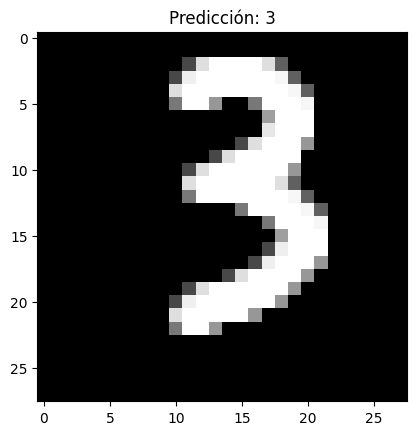

Prediccion de la imagen: [7]


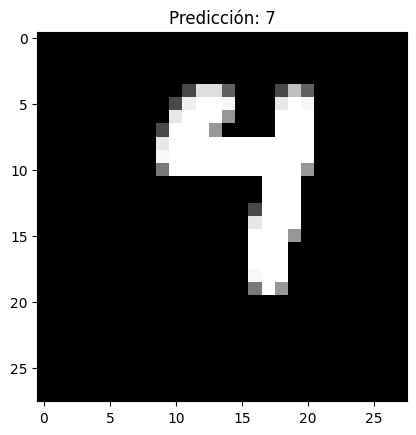

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para preprocesar una imagen (28x28 píxeles, escala de grises)
def preprocesar_imagen(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Cargar la imagen en escala de grises, saca los rdb si tiene
    img_resized = cv2.resize(img, (28, 28))  # redimenciono 28x28
    img_resized = img_resized / 255.0  # Normalizo de 0-1
    img_resized = img_resized.flatten()  # Aplanar la imagen a un vector de 784 elementos
    return img_resized

for i in range(5):
    path_imagen = f'digits/digitB{i}.png'
    imagen_procesada = preprocesar_imagen(path_imagen)

    imagen_procesada = imagen_procesada.reshape(1, -1)  # Lo cambio de (784,) a (1, 784) que es la forma correcta

    prediccion = mlp.predict(imagen_procesada)
    print(f'Prediccion de la imagen: {prediccion}')

    # La vuelvo a poner en 28x28 para que el humano vea como lo "ve" la maquina
    plt.imshow(imagen_procesada.reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {prediccion[0]}')
    plt.show()

#im10107 la saque del dataset-frame??
